# Bibliotecas

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer


# Feature Engineering

In [147]:
import pandas as pd
import numpy as np 
data= pd.read_csv("../data/processed/data_processed.csv", index_col="Unnamed: 0")
data

,date,r_fighter,b_fighter,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,time
0,2024-03-23 00:00:00,Rose Namajunas,Amanda Ribas,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,1,1,1,25.0
1,2024-03-23 00:00:00,Karl Williams,Justin Tafa,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,4,1,1,15.0
2,2024-03-23 00:00:00,Edmen Shahbazyan,AJ Dobson,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,3,2,1,4.0
3,2024-03-23 00:00:00,Payton Talbott,Cameron Saaiman,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,1,2,1,5.0
4,2024-03-23 00:00:00,Youssef Zalal,Billy Quarantillo,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,2,3,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,1994-03-11 00:00:00,Royce Gracie,Minoki Ichihara,0.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,4,3,2,5.0
7492,1994-03-11 00:00:00,Orlando Wiet,Robert Lucarelli,0.0,0.0,8.0,2.0,0.0,1.0,0.0,1.0,4,2,1,2.0
7493,1994-03-11 00:00:00,Frank Hamaker,Thaddeus Luster,0.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,4,3,3,4.0
7495,1994-03-11 00:00:00,Patrick Smith,Ray Wizard,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4,3,2,0.0


<Axes: >

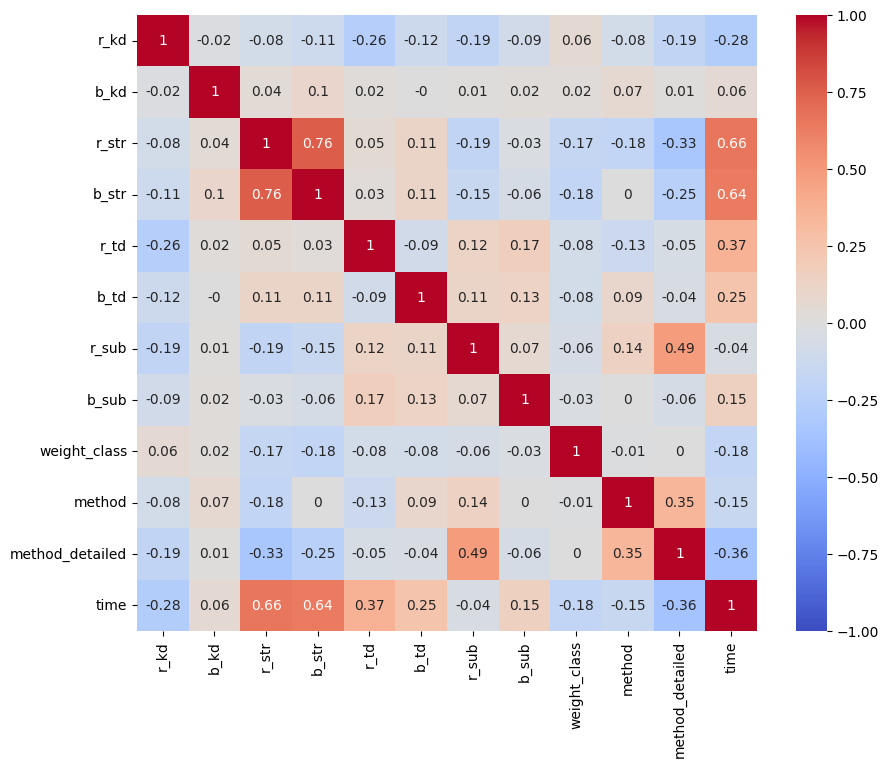

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=["date","r_fighter","b_fighter"]).corr().round(2), 
            annot=True,          
            cmap="coolwarm",     
            vmin=-1,
            vmax=1) 

# Dividir en Train y Test

In [197]:
from sklearn.model_selection import train_test_split, cross_val_score

In [150]:
train, test = train_test_split(data, random_state=42, test_size=0.2)

train.to_csv("../data/train/train.csv")
test.to_csv("../data/test/test.csv")

print(train.shape)
print(test.shape)

(5903, 15)
(1476, 15)


In [151]:
train = train.drop(columns = ["date","r_fighter","b_fighter"])

# Modelos

### Modelo 1: Regresión Lineal

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5903 entries, 6012 to 7344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   r_kd             5903 non-null   float64
 1   b_kd             5903 non-null   float64
 2   r_str            5903 non-null   float64
 3   b_str            5903 non-null   float64
 4   r_td             5903 non-null   float64
 5   b_td             5903 non-null   float64
 6   r_sub            5903 non-null   float64
 7   b_sub            5903 non-null   float64
 8   weight_class     5903 non-null   int64  
 9   method           5903 non-null   int64  
 10  method_detailed  5903 non-null   int64  
 11  time             5903 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 599.5 KB


In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [154]:
X = train.drop(columns=["time"])
y = train[["time"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4722, 11)
(1181, 11)
(4722, 1)
(1181, 1)


In [155]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [156]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 2.8277458720252437


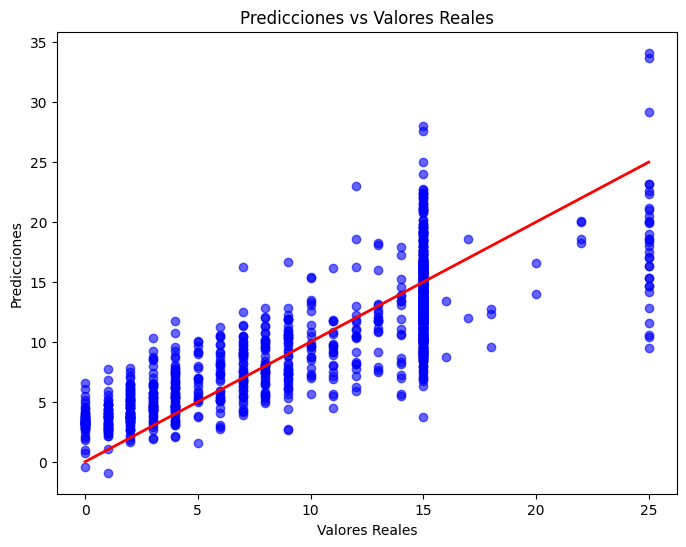

In [157]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

### Modelo 2: Decision Tree Regressor

In [158]:
# Crear el modelo
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)

# Entrenar el modelo
dt_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_dt = dt_model.predict(X_test)


In [159]:
# Evaluación del modelo
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")


Mean Absolute Error (MAE): 1.638719237588109
Mean Squared Error (MSE): 6.988990011756908


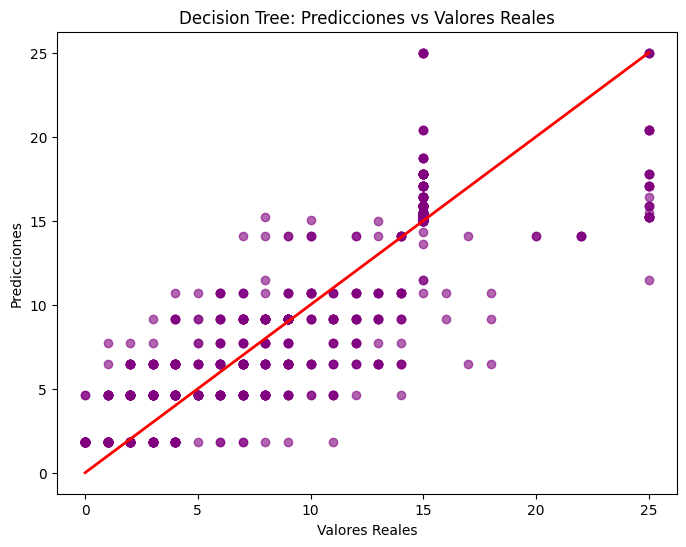

In [160]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Decision Tree: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


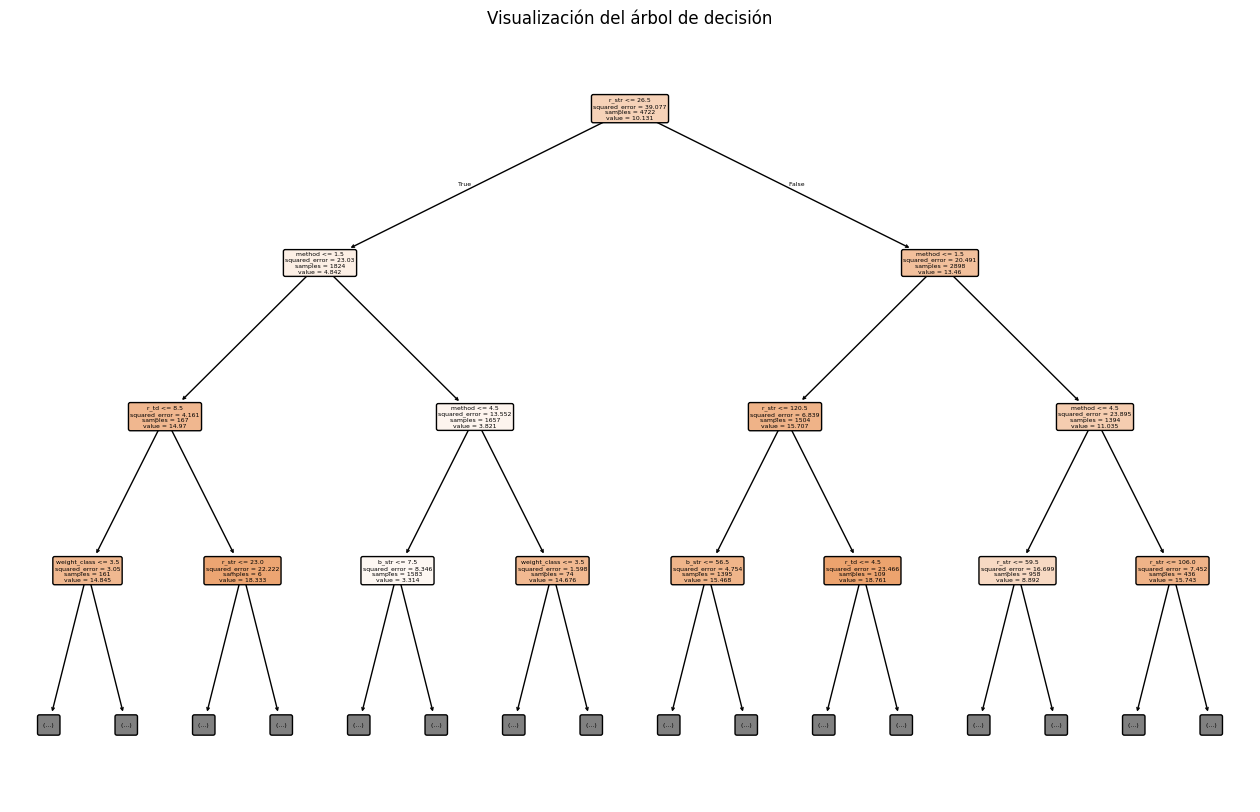

In [161]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.title("Visualización del árbol de decisión")
plt.show()


### Modelo 3: Random Forest Regressor

In [162]:
# Crear el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [163]:
# Evaluación del modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")


Mean Absolute Error (MAE): 1.4745163464816302
Mean Squared Error (MSE): 5.8806084665943805


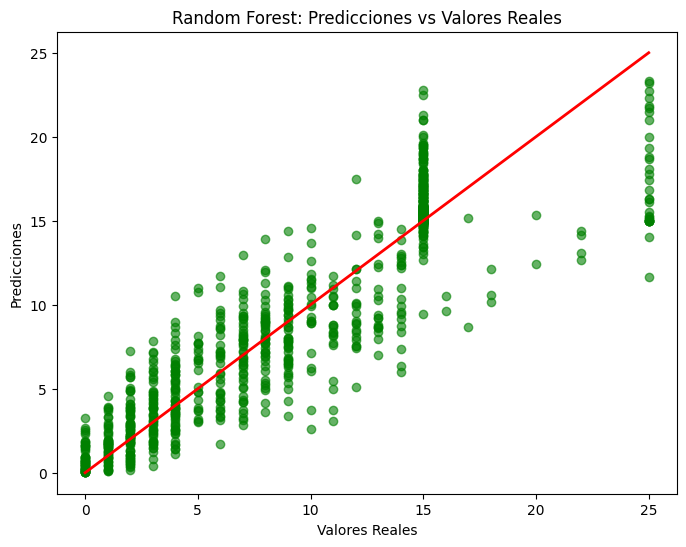

In [164]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


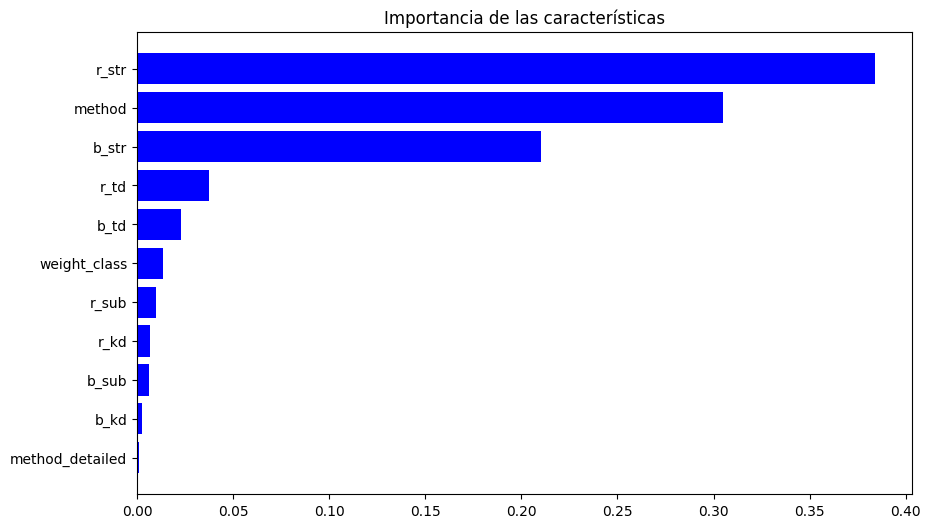

In [165]:
# Importancia de las características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='blue')
plt.title('Importancia de las características')
plt.gca().invert_yaxis()
plt.show()


In [166]:
rf_tuned = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

# Reevaluar el modelo ajustado
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
print(f"Tuned MAE: {mae_rf_tuned}")


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Tuned MAE: 1.4298219815345428


### Modelo 4: XGBoost

In [167]:
# Crear el modelo
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test)


In [168]:
# Evaluar el desempeño del modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")


Mean Absolute Error (MAE): 1.4719926303551847
Mean Squared Error (MSE): 5.734719217309421


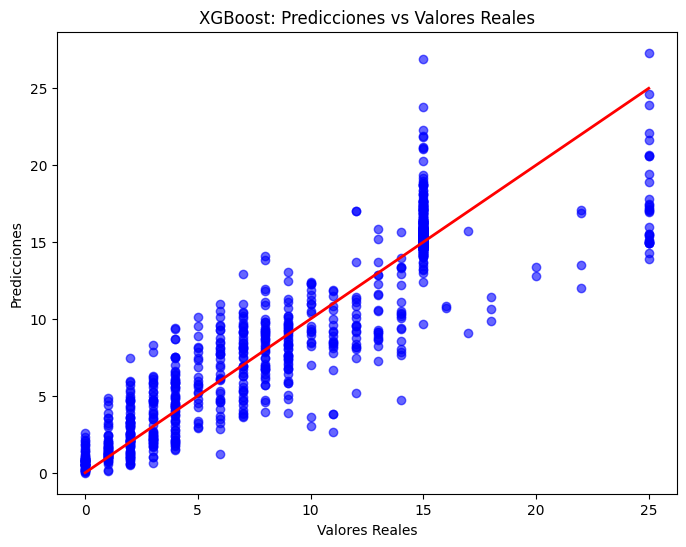

In [169]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


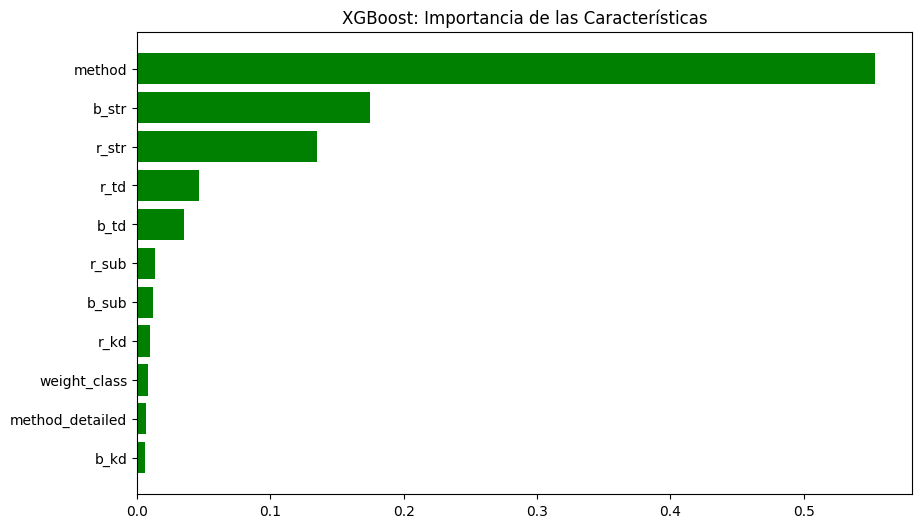

In [170]:
# Importancia de las características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='green')
plt.title('XGBoost: Importancia de las Características')
plt.gca().invert_yaxis()
plt.show()


In [171]:
xgb_tuned = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Reevaluar el modelo ajustado
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
print(f"Tuned MAE: {mae_xgb_tuned}")


Tuned MAE: 1.4457645754343267


### Modelo 5: Red Neuronal

In [172]:
# Definir la arquitectura de la red
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Capa oculta 1
    Dropout(0.2),                                              # Regularización
    Dense(64, activation='relu'),                              # Capa oculta 2
    Dropout(0.2),
    Dense(1)                                                   # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [173]:
# Entrenar el modelo
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1)


Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 96.1578 - mae: 6.6590 - val_loss: 22.9754 - val_mae: 3.4874
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.2898 - mae: 3.9306 - val_loss: 15.4407 - val_mae: 2.8952
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.5904 - mae: 3.3057 - val_loss: 13.4208 - val_mae: 2.7009
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.2537 - mae: 3.1244 - val_loss: 13.3787 - val_mae: 2.7138
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.3425 - mae: 3.0253 - val_loss: 12.6073 - val_mae: 2.6170
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.2391 - mae: 3.0191 - val_loss: 12.5149 - val_mae: 2.5619
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6098 - mae: 2.8228 - val_loss: 12.0655 - val_mae: 2.5937
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.8299 - mae: 2.9037 - val_loss: 11.7290 - val_mae: 2.5251
Epoch 9/100
119/119 ━━━━━━━━━━━━

In [174]:
# Predicciones en el conjunto de prueba
y_pred_ann = model.predict(X_test).flatten()

# Evaluación
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)

print(f"Mean Absolute Error (MAE): {mae_ann}")
print(f"Mean Squared Error (MSE): {mse_ann}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 1.556833355230966
Mean Squared Error (MSE): 6.064079239211189


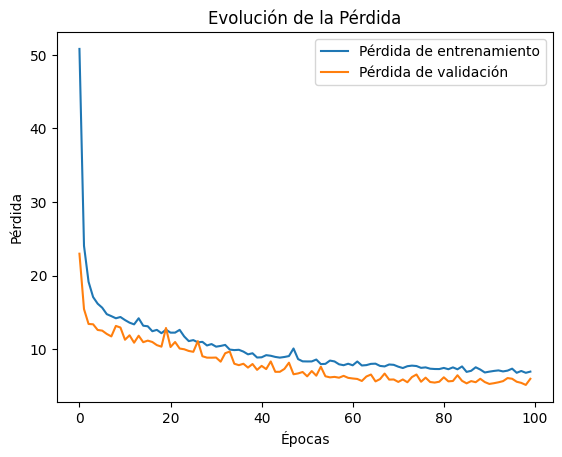

In [175]:
import matplotlib.pyplot as plt

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


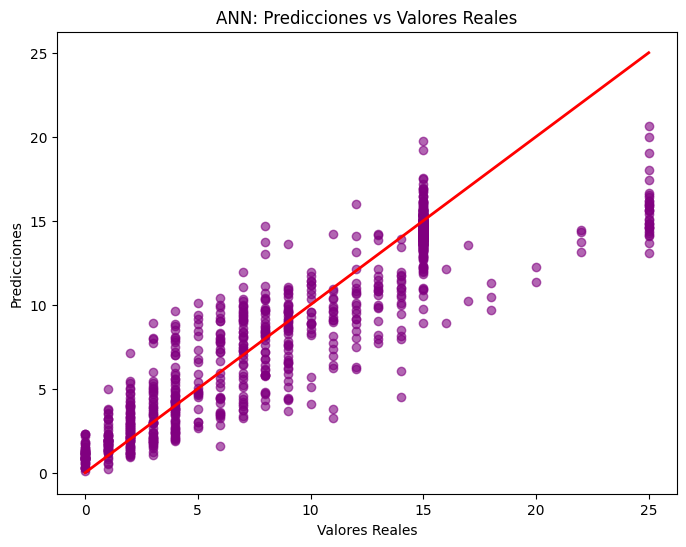

In [176]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('ANN: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


## Modelos No supervisados

### Modelo 6: Kmeans

In [181]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [180]:
metrics_media = pd.read_csv("../data/processed/metrics_media.csv")

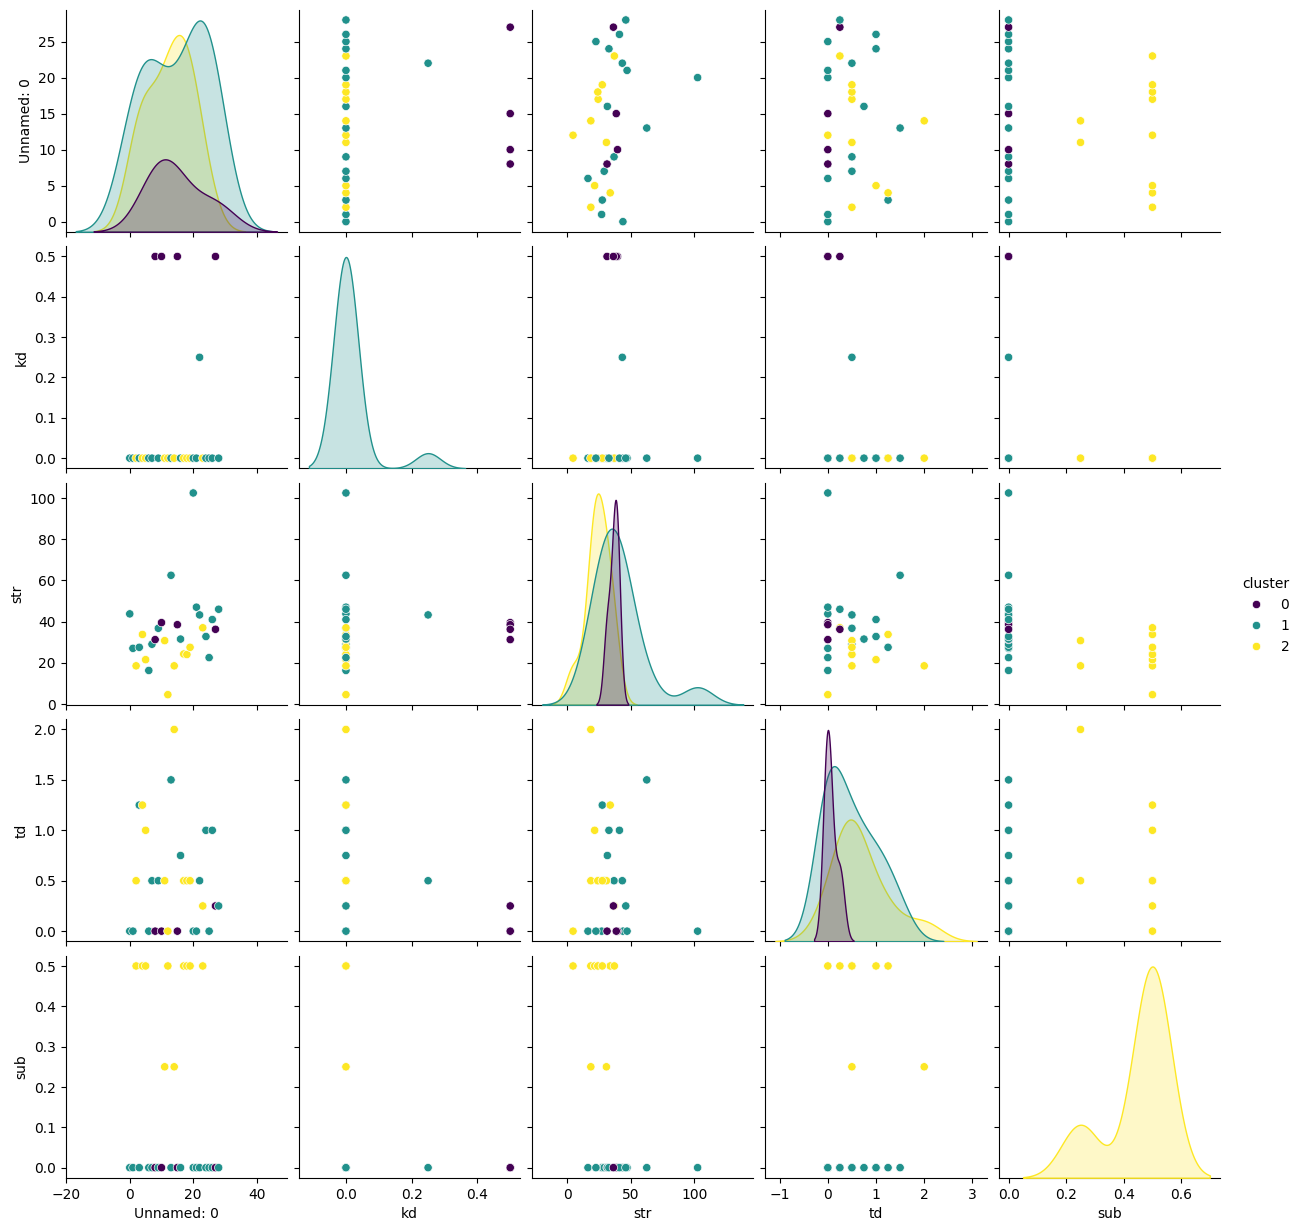

In [182]:

# Estandarizar las métricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(metrics_media[['kd', 'str', 'td', 'sub']])

# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Agregar los clústeres al dataframe
metrics_media['cluster'] = kmeans.labels_

# Visualización de los clústeres
sns.pairplot(metrics_media, hue='cluster', diag_kind='kde', palette='viridis')
plt.show()


### Modelo 7: PCA

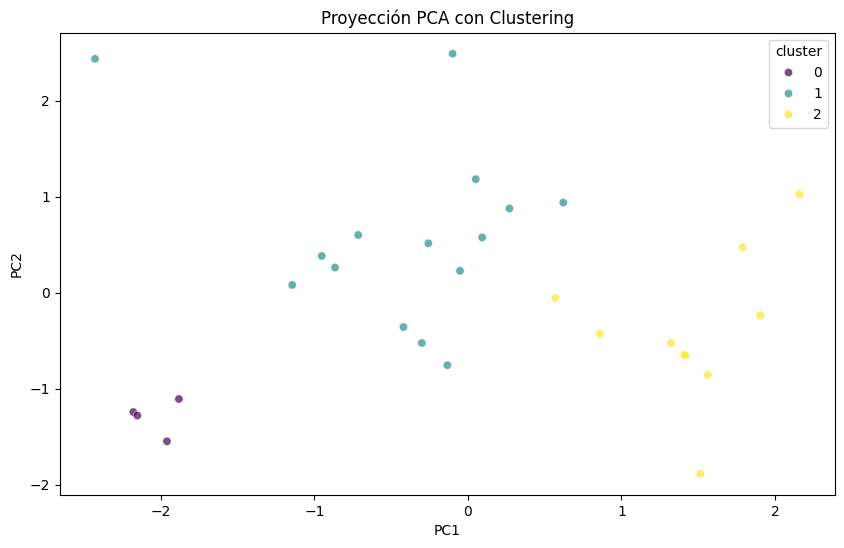

In [183]:
from sklearn.decomposition import PCA

# Reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un dataframe con las componentes principales
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans.labels_

# Visualizar los datos en el espacio reducido
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Proyección PCA con Clustering')
plt.show()


###

### Modelo 8: GradientBoostingRegressor

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

# Entrenar el modelo Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predicciones
y_pred = gbr.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE Gradient Boosting: {mae}")


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MAE Gradient Boosting: 1.515656844807007


### Modelo 9: LightGBM

In [218]:
from lightgbm import LGBMRegressor

# Entrenar el modelo LightGBM
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

# Predicciones
y_pred = lgbm.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE LightGBM: {mae}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 4722, number of used features: 11
[LightGBM] [Info] Start training from score 10.130877
MAE LightGBM: 1.4590303642481017


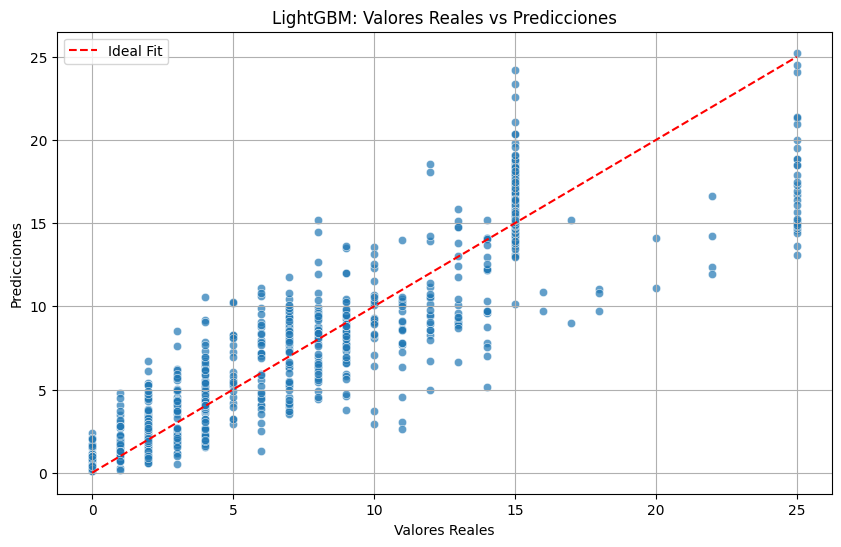

In [200]:
# Gráfico de dispersión: Valores reales vs predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("LightGBM: Valores Reales vs Predicciones")
plt.legend()
plt.grid()
plt.show()

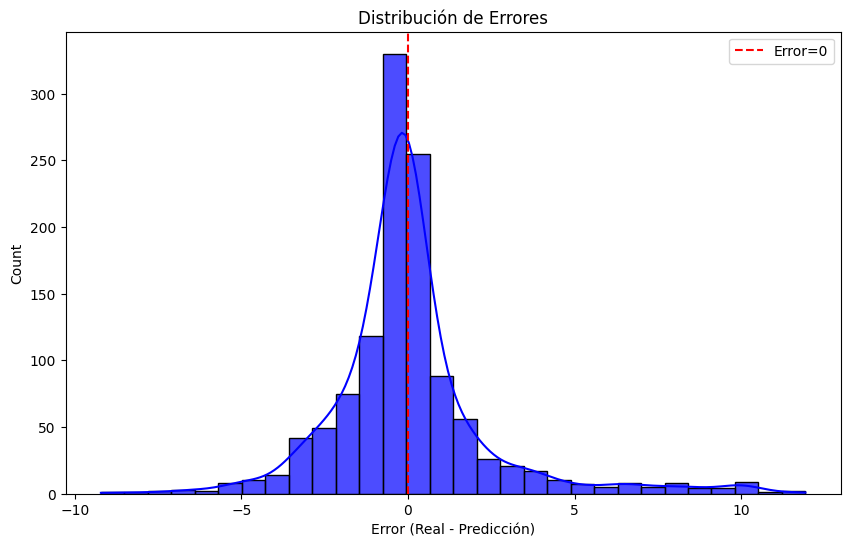

In [202]:
# Histograma de los errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue', bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', label='Error=0')
plt.xlabel("Error (Real - Predicción)")
plt.title("Distribución de Errores")
plt.legend()
plt.show()

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_13744\310960451.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


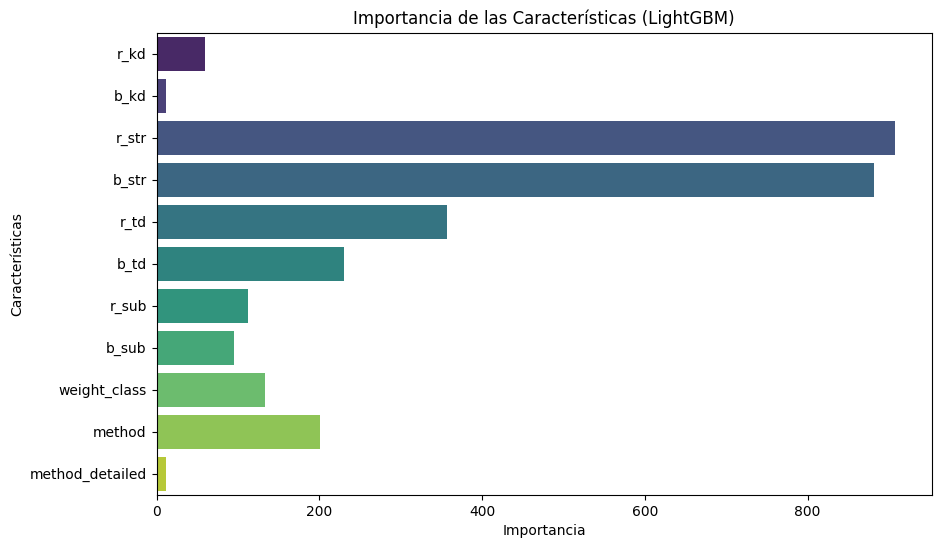

In [204]:
# Importancia de características
importances = lgbm.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Importancia de las Características (LightGBM)")
plt.xlabel("Importancia")
plt.ylabel("Características")

plt.show()

In [210]:
train.columns

Index(['r_kd', 'b_kd', 'r_str', 'b_str', 'r_td', 'b_td', 'r_sub', 'b_sub',
       'weight_class', 'method', 'method_detailed', 'time'],
      dtype='object')

Vamos a hiperparametrizar

In [206]:
from sklearn.model_selection import GridSearchCV

### Modelo 10: SupportVectorMachine

In [188]:
from sklearn.svm import SVR

# Entrenar el modelo SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predicciones
y_pred = svr.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE SVR: {mae}")


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE SVR: 2.3287251278067505


### Modelo 11: CatBoost

In [192]:
# from catboost import CatBoostRegressor

# # Entrenar el modelo CatBoost
# catboost = CatBoostRegressor(verbose=0, random_state=42)
# catboost.fit(X_train, y_train)

# # Predicciones
# y_pred = catboost.predict(X_test)

# # Métrica de evaluación
# mae = mean_absolute_error(y_test, y_pred)
# print(f"MAE CatBoost: {mae}")


### Modelo 12: Ridge Regression

In [193]:
from sklearn.linear_model import Ridge

# Entrenar el modelo Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predicciones
y_pred = ridge.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE Ridge: {mae}")


MAE Ridge: 2.8277682372527186


# PipeLine

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:


# 1. Cargar los datos
# Supongamos que `df` contiene tus datos
X = train.drop(columns=['time'])
y = train['time']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Preprocesamiento
# Supongamos que todas las columnas son numéricas por simplicidad.
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), X.columns)  # Escalar características numéricas
])

# 3. Definir los modelos
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100),
    "LightGBM": LGBMRegressor(random_state=42, n_estimators=100)
}

# 4. Crear y evaluar los pipelines
for name, model in models.items():
    # Crear el pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Preprocesamiento
        ('model', model)  # Modelo
    ])
    
    # Evaluar con validación cruzada
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name}: Mean Absolute Error: {-np.mean(scores):.2f}")


LinearRegression: Mean Absolute Error: 2.74
DecisionTree: Mean Absolute Error: 1.78
RandomForest: Mean Absolute Error: 1.43
XGBoost: Mean Absolute Error: 1.59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 3777, number of used features: 11
[LightGBM] [Info] Start training from score 10.165210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 3777, number of used features: 11
[LightGBM] [Info] Start training from score 10.198570
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 